In [ ]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
!pip install statsmodels

data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40,
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41,
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37,
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

dataset = pandas.DataFrame(data)


dataset

--2024-09-15 06:43:57--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py.1’

graphing.py.1       100%[===================>]  21.01K  --.-KB/s    in 0.002s  

2024-09-15 06:43:57 (11.6 MB/s) - ‘graphing.py.1’ saved [21511/21511]

--2024-09-15 06:43:57--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


In [ ]:
import statsmodels.formula.api as smf


formula = "boot_size ~ harness_size"

# Load in the model
model = smf.ols(formula = formula, data = dataset)

if hasattr(model, 'params'):
  print("model selected but it does not have parameters set. we need to tain it")
# Fit the model
fitted_model = model.fit()
print("the following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params[1]}\n"+
        f"Line Intercept: {fitted_model.params[0]}")



the following model parameters have been found:
Line slope: 0.585925416738271
Line Intercept: 5.71910981268259


<ipython-input-4-5812ed4aa17d>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Line slope: {fitted_model.params[1]}\n"+
<ipython-input-4-5812ed4aa17d>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Line Intercept: {fitted_model.params[0]}")


<ipython-input-8-cc53b817e028>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dataset["harness_size"], fitted_model.params[1] * dataset['harness_size'] + fitted_model.params[0], 'r', label='fitted line')


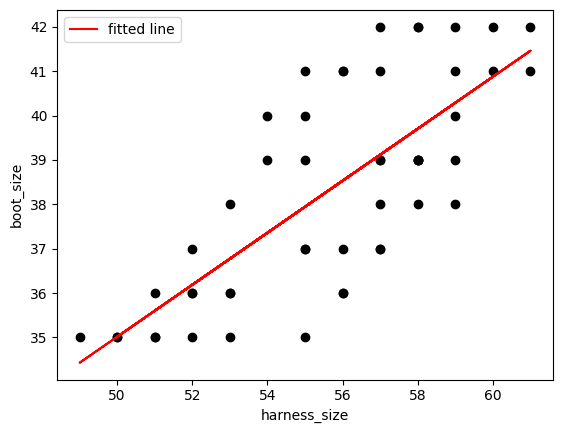

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dataset['harness_size'], dataset['boot_size'], color='black')
plt.plot(dataset["harness_size"], fitted_model.params[1] * dataset['harness_size'] + fitted_model.params[0], 'r', label='fitted line')
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend()
plt.show()

In [ ]:
harness_size = { 'harness_size' : [52.5] }


approximate_boot_size = fitted_model.predict(dataset["harness_size"])
print("Estimated approximate_boot_size:")
dataset['predicted size'] = approximate_boot_size
dataset.head()

Estimated approximate_boot_size:
0     39.702784
1     39.702784
2     36.187231
3     39.702784
4     39.116859
5     36.187231
6     37.945008
7     36.773157
8     34.429455
9     37.359082
10    40.288709
11    38.530933
12    36.773157
13    39.702784
14    39.116859
15    39.702784
16    38.530933
17    35.601306
18    35.015381
19    40.288709
20    40.288709
21    40.288709
22    37.945008
23    35.015381
24    37.945008
25    36.187231
26    36.773157
27    37.359082
28    41.460560
29    38.530933
30    37.945008
31    40.874635
32    39.116859
33    38.530933
34    41.460560
35    39.702784
36    36.773157
37    39.116859
38    39.116859
39    37.945008
40    40.874635
41    35.601306
42    36.187231
43    38.530933
44    37.945008
45    39.116859
46    39.702784
47    39.116859
48    35.601306
49    40.288709
dtype: float64


,boot_size,harness_size,predicted size
0,39,58,39.702784
1,38,58,39.702784
2,37,52,36.187231
3,39,58,39.702784
4,38,57,39.116859
